# COMP3222/COMP6246 Machine Learning Technologies (2023/24)

## Lab 6 - Recurrent Neural Networks (Chapter 15)

Follow each section at your own pace, you can have a look at the book or ask questions to demonstrators if you find something confusing.

# 1. Basic Theory

Until now, we looked into basic preceptrons, convolutional neural network (CNN) and how to implement them in TensorFlow. In practice these techniques are used in tasks such as: searching images, self-driving cars, automatic video classification and many more. Surely, there are different network architectures that are used in Deep Learning. In the previous lab, we showed that CNNs are essentially for `"processing a grid of values"`. However, the Deep Learning community has also generated another architecture specifically for `"processing a sequence of values"`, which are called **Recurrent Neural Networks (RNN)** [Goodfellow 2016]. These types of networks can work on sequences of arbritary lengths rather than fixed-sized inputs. 

In practice, recurrent neural networks are used for analyzing time series: stock prices, car trajectories, sentiment analysis and more. 

_Get Motivated_: Have a look at [this interactive example](https://distill.pub/2016/handwriting/), which generates new strokes in your handwriting style using RNNs. The model is explained in [this paper](https://arxiv.org/abs/1308.0850).

## Bare-bones RNN

First, lets import the required modules.

Make sure your cell outputs **"True"**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# These two lines are required to use Tensorflow 1
import tensorflow as tf
from tensorflow.python.framework.ops import enable_eager_execution
enable_eager_execution()
print("\n\n", tf.executing_eagerly())

2023-11-16 15:35:59.696869: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 15:35:59.698546: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 15:35:59.722706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 15:35:59.722726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 15:35:59.723351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to



 True


Next, let's implement an RNN with five recurrent neurons without using TensorFlow's RNN implementation/utilities. 

In [3]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)

reset_graph()
# Let's assume some artificial data with three input (if our objective is to predict words in a sentence
n_inputs = 3  # then for instance: first word, second word, third word can be the input of our model)
n_neurons = 5 # number of neurons

# Weights on inputs (all steps share this), initialy they are set random
Wx = tf.Variable(tf.random.normal(shape=[n_inputs, n_neurons],dtype=tf.float32))

# Connection weights for the outputs of the previous timestep (all steps share this), initialy they are set random 
Wy = tf.Variable(tf.random.normal(shape=[n_neurons,n_neurons],dtype=tf.float32))

# bias vector, all zeros for now
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# Mini-batch:        instance1  instance2   instance3 instance4
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]], dtype=np.float32) # t = 0 (e.g. instance1=(first, second and third word))
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]], dtype=np.float32) # t = 1 (e.g. instance1=(second, third and fourth word)

# outputs of timestep 0
Y0_val = tf.tanh(tf.matmul(X0_batch, Wx) + b)

# outputs of timestep 1
Y1_val = tf.tanh(tf.matmul(Y0_val, Wy) + tf.matmul(X1_batch, Wx) + b)
# Y1 = activation_function(dot_product(Y0, Wy) + dot_product(X1, Wx) + bias_vector)

2023-11-16 15:36:03.501110: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-11-16 15:36:03.501129: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: ayomide
2023-11-16 15:36:03.501133: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: ayomide
2023-11-16 15:36:03.501192: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.129.3
2023-11-16 15:36:03.501201: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.129.3
2023-11-16 15:36:03.501203: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.129.3


In [4]:
print(Y0_val.numpy()) # layers output at t=0

[[-0.9993961  -0.79556715 -0.574853   -0.97241074 -0.74066293]
 [-1.         -0.99998957  0.13026439 -0.9999983  -1.        ]
 [-1.         -1.          0.7243606  -1.         -1.        ]
 [ 0.89381933 -0.99999964  0.9791972  -1.         -1.        ]]


In [5]:
print(Y1_val.numpy()) # layers output at t=1

[[-1.         -1.          0.9869496  -1.         -1.        ]
 [-0.99352974 -0.9237034  -0.62660754 -0.06871291  0.76341635]
 [-1.         -1.          0.84098613 -1.         -1.        ]
 [-0.99999654 -0.9999995   0.77821314 -0.99976623 -0.99999964]]


Great. Now try to solve the following exercises from the comments in the code:

*Exercise 1.1.*: Why are there five columns in both outputs?

*Exercise 1.2.*: Why are there four rows?

*Exercise 1.3.*: Which batch instances corresponds to which rows 1 - 4 at t=1 and why? 

*Exercise 1.4.*: Why is the eqaution for the Y1_val longer than that for Y0_val?

*Exercise 1.5.*: What would be the difference between `instance1` at $t=0$ and `instance1` at $t=1$?

**Solutions**

1.1. There are `5` recurrent neurons

1.2. In each batch, `4` input instances were fed to the RNN model

1.3. Instances of X1_batch corresponds to row 1-4, etc. At t=1, the output is Y1_val and X1_batch is the input

1.4. at t=0, the recurrent input is 0. So the second matmul operation is 0 and does not need to be computed.

1.5. They are not related in any way

# 2. Predicting Time Series

Let's look at a simple use of RNNs with time series, these time series could be stock prices, bus or rail ridership and so on. Given available data, our objective can be to forecast the number of passengers that will ride or bus tommorrow. 

Let's assume you are a data scientist at Transport for London (TfL). You will be developing a production model to reliably predict the number of passangers that will take the bus in the coming festive seasons for some transport related reasons. You team leader however want you to investigate the best approach to develop the model so they provide you with daily ridership data from Chicago Transit Authority since 2001.

This data is raw so you will have to clean it up first and visualize as required of a data scientist. Luckily one your team member has offered to do this but you still need to pay attention to how they did it. Also, its data from Chicago so you will be working with YYYY-MM-DD time format.

**You can refer to Lab 1 for a refresher on Pandas**

We will use one of keras utilities `tf.keras.utils.get_file` to download the dataset. You can read about it here - https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file

           day_type     bus    rail
date                               
2001-01-01        U  297192  126455
2001-01-02        W  780827  501952
2001-01-03        W  824923  536432
2001-01-04        W  870021  550011
2001-01-05        W  890426  557917


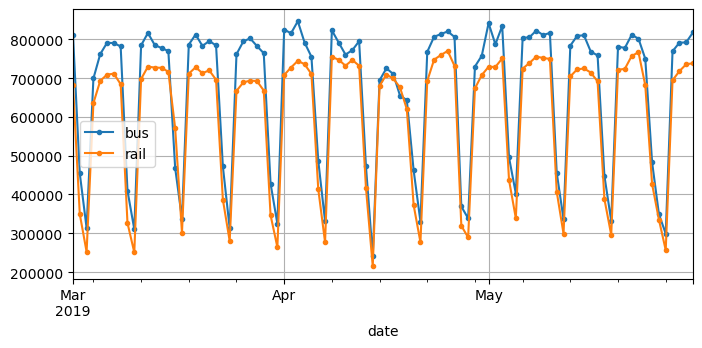

In [6]:
# Import neccessary modules and load the dataset using Pandas
import pandas as pd
from pathlib import Path

# Create path for the dataset and download it
path = Path("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
cta_url = "https://drive.google.com/uc?export=download&id=1nAmmZfZloZR3CbEgSafJTLXrzxY-Upv2"
tf.keras.utils.get_file(fname=path.absolute(), origin=cta_url)

# Load with pandas and preprocess
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"] # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1) # no need for total, it's just bus + rail
df = df.drop_duplicates() # remove duplicated months (2011-10 and 2014-07)

# Have a quick look at the dataset 
# Column day_type is a bit tricky with W = Weekdays, U = Sunday, and A = Saturday
print(df.head())

# This plots the ridership data between March 2019 and May 2019
df["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

It is obvious from the plot that our data contains values at different timesteps occuring at regular interval. This is a defining characteristic of time series data. Also, we have multiple value per time steps, thus it is a `multivariate time series`. Otherwise, it is a `univariate time series`.

Our dataset has a suprisingly regular interval that we can almost get away with just copying the data for the previous week as the prediction for the next week. This is called `naive forecasting`. 

We will not be doing this as it is too simple. Instead, we will build our baseline model using a common statiscal model for time series model called *autoregressive moving average (ARMA)*

# ARMA - ARIMA Baseline

ARMA is a very old forecasting model (1930s) that computes its predictions using a simple weighted sum of lagged values and corrects these forecasts by adding a moving average. Specifically, the moving average component is computed using a weighted sum of the last few forecast errors. 

Other models in the ARMA family include *autoregressive integration moving average (ARIMA)* and *seasonal autoregressive integration moving average (SARIMA)*`.

With SARIMA, seasonal components of the time series can be captured using the ARIMA approach. 

Lets assume you have data from `2019-01-01-` to `2019-05-31` and you want to forecast the next day's rail ridership i.e. `2019-06-01`

In [22]:
from statsmodels.tsa.arima.model import ARIMA

origin, today = "2019-01-01", "2019-05-31"
rail_series = df.loc[origin:today]["rail"].asfreq("D")
model = ARIMA(rail_series,
order=(1, 0, 0),            # basic ARIMA parameters to determine the amount of forcast error to consider
seasonal_order=(0, 1, 1, 7)) # SARIMA parameters to capture seasonal changes
model = model.fit()
y_pred = model.forecast()[0] # returns 427,758.6

In [23]:
print(y_pred)

427758.626285891


Explore the dataframe `df` to see the ground truth value for `2019-06-01` #Hint use pd.loc[]

**Questions**

How did ARIMA do? 

Can you calculate the percentage error in ARIMA's prediction?

Now lets compute the mean absolute error (MAE) for ARIMA using daily predictions for March, April and May 2019.

**Solutions**

In [24]:
arima_error = abs(y_pred - df.loc["2019-06-01"]["rail"])
percentage_error = (arima_error/df.loc["2019-06-01"]["rail"]) * 100
print(arima_error)
print(percentage_error)

48714.62628589099
12.851971350526851


In [25]:
# Set training data begin date, prediction start date and prediction end date
origin, start_date, end_date = "2019-01-01", "2019-03-01", "2019-05-31"

# Define prediction range and load data
time_period = pd.date_range(start_date, end_date)
rail_series = df.loc[origin:end_date]["rail"].asfreq("D")

y_preds = []

# ARIMA training loop
for today in time_period.shift(-1):
    model = ARIMA(rail_series[origin:today], # train on data up to "today"
    order=(1, 0, 0),
    seasonal_order=(0, 1, 1, 7))
    model = model.fit() # note that we retrain the model every day!
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)

y_preds = pd.Series(y_preds, index=time_period)
mae_arima = (y_preds - rail_series[time_period]).abs().mean() # returns 32,040.7
print("MAE for ARIMA", mae_arima)

MAE for ARIMA 32040.72011180737


## Using a RNN Model

Now that we have a baseline, we have something to compare the performance of the RNN model on the time series date with.

We however need to preprocess the time series data first.

Luckily, Keras have a nice utility functions called `tf.keras.utils.timeseries_dataset_from_array()` that can help us do this seamlessly - https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array.

We want to train our RNN model using **3 years** rail ridership data, validate it on **5 monhts** data and then predict the number of rail passangers for the **1 month**.

We will also use a sequence length of **8 weeks**

In [27]:
# Data splitting and scaling
rail_train = df["rail"]["2016-01":"2018-12"] / 1e6
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

# Preprocessing training and validation datasets with keras utility function
seq_length = 56
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_train.to_numpy(),
    targets=rail_train[seq_length:],
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_valid.to_numpy(),
    targets=rail_valid[seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

Now lets define  simple RNN model with **32** recurrent neurons and a dense layer to provide a single output. You can read more about SimpleRNN here - https://keras.io/api/layers/recurrent_layers/simple_rnn/

In [28]:
# Simple model definintion
simple_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1]),
    tf.keras.layers.Dense(1) # no activation function by default
])

# Metrics for early stopping and optimization
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

simple_model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = simple_model.fit(train_ds, validation_data=valid_ds, epochs=500, callbacks=[early_stopping_cb])

Epoch 1/500
33/33 [==============================] - 1s 10ms/step - loss: 0.0084 - mae: 0.1003 - val_loss: 0.0043 - val_mae: 0.0781
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0052 - mae: 0.0733 - val_loss: 0.0036 - val_mae: 0.0631
Epoch 3/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0654 - val_loss: 0.0027 - val_mae: 0.0551
Epoch 4/500
33/33 [==============================] - 0s 5ms/step - loss: 0.0041 - mae: 0.0629 - val_loss: 0.0028 - val_mae: 0.0525
Epoch 5/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0564 - val_loss: 0.0025 - val_mae: 0.0482
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0580 - val_loss: 0.0027 - val_mae: 0.0504
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.0036 - mae: 0.0572 - val_loss: 0.0025 - val_mae: 0.0471
Epoch 8/500
33/33 [==============================] - 0s 7ms/step - loss: 0.0034 - 

**Exercise**

Great. Now see if you can complete these exercises

*Exercise 2.1:* Why do we have an input shape with `None` in it? - RNN can take arbritary sequence of input or output

*Exercise 2.2:* What is the final validation mae with this model? Is it better than what we had with ARIMA?

*Exercise 2.3:* We can improve our model by making it deeper and tweaking some of its implementation parameters. See what you can do to improve the validation mae. 

Don't was too much time on this if you cannot make the mae smaller. *#Hint: Use return_sequences=True and stack up layers* 

**Solutions**

2.1. RNNs can take in arbritary inputs

2.2. 30700 - Not so much better than arima with about 32000

In [29]:
# 2.3. Possible solution
deep_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

# Metrics for early stopping and optimization
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

deep_model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = deep_model.fit(train_ds, validation_data=valid_ds, epochs=500, callbacks=[early_stopping_cb])

Epoch 1/500
33/33 [==============================] - 2s 22ms/step - loss: 0.0246 - mae: 0.1784 - val_loss: 0.0183 - val_mae: 0.1176
Epoch 2/500
33/33 [==============================] - 1s 15ms/step - loss: 0.0153 - mae: 0.1395 - val_loss: 0.0040 - val_mae: 0.0677
Epoch 3/500
33/33 [==============================] - 1s 17ms/step - loss: 0.0062 - mae: 0.0799 - val_loss: 0.0032 - val_mae: 0.0584
Epoch 4/500
33/33 [==============================] - 1s 17ms/step - loss: 0.0049 - mae: 0.0672 - val_loss: 0.0021 - val_mae: 0.0437
Epoch 5/500
33/33 [==============================] - 0s 13ms/step - loss: 0.0046 - mae: 0.0653 - val_loss: 0.0040 - val_mae: 0.0690
Epoch 6/500
33/33 [==============================] - 1s 15ms/step - loss: 0.0045 - mae: 0.0637 - val_loss: 0.0021 - val_mae: 0.0426
Epoch 7/500
33/33 [==============================] - 0s 14ms/step - loss: 0.0041 - mae: 0.0587 - val_loss: 0.0023 - val_mae: 0.0436
Epoch 8/500
33/33 [==============================] - 1s 17ms/step - loss: 0.

## 3. Generative RNN

RNN models can generate sequence of output from an input provided. This aligns with the goal of Natural Language Processing (NLP) where we want to produce sequences of texts from a textual prompt (e.g. ChatGPT, Bard, Gork).

RNNs are extensively used in Generative Models. 

Lets train our own textual genarative model which we will call **char_RNN** to predict the next character in a sentence and produce novel texts. 

**char_RNN** is designed to predict the next character but our objective is to make it generate novel Shakespearean texts. 

Lets start by downloading all of Shakespear's works and printing a few lines.

In [30]:
# Dataset downloading and preparation
shakespeare_url = "https://homl.info/shakespeare" # shortcut URL
filepath = tf.keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

# Prints some Shakespearean texts
print(shakespeare_text[:80])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


Now we have to vectorize the texts to encode them. We could do this manually as we did in Lab 4. However, Keras provides easy ways to do this using the TextVectorization method. 

You can read more about it here - https://keras.io/api/layers/preprocessing_layers/core_preprocessing_layers/text_vectorization/

We need character level encoding so we will set `split=character`

In [31]:
text_vec_layer = tf.keras.layers.TextVectorization(split="character", standardize="lower")
text_vec_layer.adapt([shakespeare_text])
encoded = text_vec_layer([shakespeare_text])[0]

encoded -= 2 # drop tokens 0 (pad) and 1 (unknown), which we will not use
n_tokens = text_vec_layer.vocabulary_size() - 2 # number of distinct chars = 39
dataset_size = len(encoded) # total number of chars = 1,115,394
print("Unique Tokens: ", n_tokens)
print("Dataset size: ", dataset_size)

Unique Tokens:  39
Dataset size:  1115394


Our dataset is now a long sequence of vectors and we need to preprocess into sequences of input and targets. 

We will create a custom function to do this. This function will turn our long sequence of vector into a smaller sequence of a specifed length (or window size), selects the next character for as the target and then create the next input sequence moving one character forward. It will then shuffle them and split them into batches.

Our dataset is very large and will take enormous time to train. To reduce training time, we will use only about 10% (100,000 vectors) for training and testing. This will hurt our accuracy but we will manage. 

In your free time, you can train the model using the full dataset using at least 10 epochs and compare the differences.

We will use a window size of `100` and split the dataset we are using into 90% training, 5% validation and 5% testing.

In [32]:
# Helper function to prepare dataset
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))
    if shuffle:
        ds.shuffle(buffer_size=100_000, seed=seed)
    ds = ds.batch(batch_size)
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

# Split dataset into training, validation and testing and use a sequence length of 100
length = 100
tf.random.set_seed(42)
train_set = to_dataset(encoded[:90_000], length=length, shuffle=True, seed=42)
valid_set = to_dataset(encoded[90_000:95_000], length=length)
test_set = to_dataset(encoded[95_000:100_000], length=length)

We are now ready to train our **char_RNN** model.

We use an Embedding layer to encode the character IDs. The input to the embedding layer is the number of unique character tokens that we have and the output_dim is a tunable hyperparmeter. https://keras.io/api/layers/core_layers/embedding

The second layer is a Gated RNN layer and it is allows you to learn longer sequences compared to a simple RNN.  You can explore more about GRU here - https://d2l.ai/chapter_recurrent-modern/gru.html

Training should take about **12** minutes. If you do not want to wait, uncomment the commented code in the cell below. You won't get a good model though.

In [33]:
# Uncomment this code to trade off accuracy for faster training
"""
length = 100
train_set = to_dataset(encoded[:50_000], length=length, shuffle=True, seed=42)
valid_set = to_dataset(encoded[50_000:52_000], length=length)
test_set = to_dataset(encoded[52_000:54_000], length=length)
#"""

# Uncomment this to use the full dataset for training - We are talking 2 hours training time!!!
"""
length = 100
train_set = to_dataset(encoded[:1_000_000], length=length, shuffle=True, seed=42)
valid_set = to_dataset(encoded[1_000_000:1_060_000], length=length)
test_set = to_dataset(encoded[1_060_000:], length=length)
"""

'\nlength = 100\ntrain_set = to_dataset(encoded[:1_000_000], length=length, shuffle=True, seed=42)\nvalid_set = to_dataset(encoded[1_000_000:1_060_000], length=length)\ntest_set = to_dataset(encoded[1_060_000:], length=length)\n'

In [34]:
# char_RNN model definition
char_rnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=32),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(n_tokens, activation="softmax")
    ])
char_rnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = char_rnn_model.fit(train_set, validation_data=valid_set, epochs=5)     #chnge number of epochs here


Epoch 1/5
2810/2810 [==============================] - 120s 42ms/step - loss: 2.1035 - accuracy: 0.3894 - val_loss: 1.7833 - val_accuracy: 0.4773
Epoch 2/5
2810/2810 [==============================] - 117s 42ms/step - loss: 1.7154 - accuracy: 0.4865 - val_loss: 1.6463 - val_accuracy: 0.5150
Epoch 3/5
2810/2810 [==============================] - 117s 42ms/step - loss: 1.5865 - accuracy: 0.5207 - val_loss: 1.6033 - val_accuracy: 0.5333
Epoch 4/5
2810/2810 [==============================] - 112s 40ms/step - loss: 1.5103 - accuracy: 0.5412 - val_loss: 1.5952 - val_accuracy: 0.5337
Epoch 5/5
2810/2810 [==============================] - 119s 42ms/step - loss: 1.4583 - accuracy: 0.5551 - val_loss: 1.5999 - val_accuracy: 0.5307


To predict the next character, we have to convert the output of our model back to a character. We will warp our model's output with a text vectorization layer and add back the `2` unused tokens before converting to a character.

In [35]:
# Wrapping the model in a text vectorization layer for prediction 
shakespeare_model = tf.keras.Sequential([
    text_vec_layer, tf.keras.layers.Lambda(lambda X: X - 2), char_rnn_model
])

y_proba = shakespeare_model.predict(["To be or not to b"],verbose=0)[0, -1]
y_pred = tf.argmax(y_proba) # choose the most probable character ID
char_pred = text_vec_layer.get_vocabulary()[y_pred + 2]
print("Predicted character is: ", char_pred)

Predicted character is:  e


# Generating Fake Texts

Now that we can generate characters, we can acheive our objective of generating fake texts by tweaking how our model works. 

To do this, we provide our model with a seed phrase or prompt, let it predict the next letter and then feed the extended text to it so it can provide the next letter again. If we do this long enough, we can have a lot of fake text. This approach is called `greedy decoding` and the model sometimes get stuck and keep repeating the same words.

To generate more interesting and diverse fake texts, we need to ramdomize the generation of the next letter. 

We will use the tf.random.categorical() function and define two helper functions. To control the diversity in the generated text, we will define a parameter `temprature`. A temperature value close to zero favour characters with high probability while a high temperature value gives all characters equal probabilities.

In [36]:
# Helper function to get next character given a text and temperature value
def next_char(text, temperature=1):
    y_proba = shakespeare_model.predict([text], verbose=0)[0, -1:]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
    return text_vec_layer.get_vocabulary()[char_id + 2]

# Helper function to extend text by calling next_char repeatedly
def extend_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [37]:
# Generate some fake texts
tf.random.set_seed(42)
print(extend_text("To be or not to be", temperature=0.01))

To be or not to be gone that is the market-place.

coriolanus:
well,


**Exercise**

Great. We now have some novel Shakespearean texts even though they are not so accurate. See if you can do the Exercises below:

*Exercise 3.1:* How does the generated text looks like when you set the temperature value to `1`?

*Exercise 3.2:* What if you change it to `100`?

*Exercise 3.3:* Change the output_dim in the Embedding layer and observe its impact on generated text?



**Solutions**

These solutions are implementation specific.

# Recap

In this lab, we demonstrated these concepts:

* from theory to implementation, how a simple RNN is works
* how to predict a time series with RNN 
* which parameters to look out for in order to improve the predictions
* generation of sequences with a RNN

As in the previous labs, there is some material that we have not been able to cover. In your free time, you can have a look at:

* LTSM Cells and GRU Cells
* NLP Applications with RNNs
* Encoding and Decoding with RNNs

### References
[Goodfellow, 2016] : https://www.deeplearningbook.org/